In [1]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import os
import os.path as path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import ipywidgets as widgets
from ipywidgets import fixed, interact_manual, widgets
from IPython.display import display
import copy
from scipy.optimize import curve_fit
from scipy.stats import linregress
import pandas as pd
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Local module and scripts
from pyccapt.calibration.calibration import tools, share_variables
from pyccapt.calibration.calibration import widgets as wd
from pyccapt.calibration.data_tools import data_tools, data_loadcrop, dataset_path_qt
from pyccapt.calibration.leap_tools import ccapt_tools
from pyccapt.calibration.calibration import share_variables
from pyccapt.calibration.calibration import mc_plot

In [2]:
variables = share_variables.Variables()

In [3]:
# button = widgets.Button(description='load dataset')

# @button.on_click
# def open_file_on_click_r(b):
#     global dataset_path
#     folder_path = variables.last_directory
#     script = '..//..//data_tools//run_dataset_path_qt.py'
#     cmd = f"python {script} {folder_path}"
#     result = subprocess.run(cmd, capture_output=True, text=True, shell=True)
#     dataset_path = result.stdout.strip()
#     variables.last_directory = dataset_path

# button

In [4]:
# flightPathLength = 243 # 105.35 # mm 
# # The initial value for t_0
# t0 = 33 #68.48 # ns

# dataset name
# data_115_Jul-27-2022_17-44_Powersweep3

In [5]:
# ref_angle = 260
# ref_laser_intensity = 1.4e13
# pulse_energy = ref_laser_intensity * (10 ** ((angle - ref_angle) / (270 * 0.5)))
# # 1 μm^2 =1×10^−8 cm^2
# #Energy per pulse (J) = Power Density (W/cm^2) * Area (cm^2) * Pulse Duration (s)
# pulse_energy = pulse_energy * 6e-8 *  12e-15 * 1e12
# variables.data['pulse'] = pulse_energy

$$\textbf{You can specify the model of the TDC and dataset name down below}$$

In [6]:
tdc, pulse_mode, flightPathLength_d, t0_d, max_mc, det_diam = wd.dataset_instrument_specification_selection()
display(tdc, pulse_mode)

Dropdown(description='Data mode:', options=('pyccapt', 'leap_epos', 'leap_pos', 'leap_apt', 'ato_v6'), value='…

Dropdown(description='Pulse mode:', options=('voltage', 'laser'), value='voltage')

In [7]:
dataset_path_171fs = 'D:/pyccapt/tests/data/physics_experiment/data_115_Jul-27-2022_17-44_Powersweep3/data_processing/data_115_Jul-27-2022_17-44_Powersweep3.h5'
dataset_path_12fs =  'D:/pyccapt/tests/data/physics_experiment/data_207_Feb-01-2024_13-08_Powersweep/data_processing/data_207_Feb-01-2024_13-08_Powersweep.h5'
# dataset_path_12ps = 'D:/pyccapt/tests/data/physics_experiment/R56_06712-v01/data_processing/R56_06712-v01.h5'
dataset_path_12ps = 'D:/pyccapt/tests/data/physics_experiment/LEAP_R56_09319_W_RT_powersweep/R56_09319-v01.h5'
# dataset_path_171fs = 'C:/Users/mehrp/PycharmProjects/pyccapt/tests/data/physics_experiment/data_115_Jul-27-2022_17-44_Powersweep3/data_processing/data_115_Jul-27-2022_17-# # 44_Powersweep3.h5'
# dataset_path_12fs =  'C:/Users/mehrp/PycharmProjects/pyccapt/tests/data/physics_experiment/data_207_Feb-01-2024_13-08_Powersweep/data_processing/data_207_Feb-01-2024_13-# # 08_Powersweep.h5'
# dataset_path_12ps = 'C:/Users/mehrp/PycharmProjects/pyccapt/tests\data/physics_experiment/R56_06712-v01/data_processing/R56_06712-v01.h5'

In [8]:
# exctract needed data from Pandas data frame as an numpy array
# create an instance of the Variables opject
variables = share_variables.Variables()
variables.pulse_mode = pulse_mode

variables.result_data_path = 'D:/pyccapt/tests/data/physics_experiment/results' 
variables.result_data_name = 'power_sweep'
variables.result_path ='D:/pyccapt/tests/data/physics_experiment/results'

if not os.path.isdir(variables.result_path):
    os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
    
# Create data farame out of hdf5 file dataset
data_171fs = data_tools.load_data(dataset_path_171fs, tdc.value, mode='processed')
data_12fs = data_tools.load_data(dataset_path_12fs, tdc.value, mode='processed')
data_12ps = data_tools.load_data(dataset_path_12ps, tdc.value, mode='processed')


In [9]:
data_12ps

,x (nm),y (nm),z (nm),mc (Da),mc_uc (Da),high_voltage (V),pulse,t (ns),t_c (ns),x_det (cm),y_det (cm),pulse_pi,ion_pp,start_counter
0,0.444552,-11.117000,1.442968,61.286091,0.0,7489.000000,50,2227.429688,0.0,0.066835,-0.740000,0,1,0
1,-7.723223,7.492853,1.348322,60.641232,0.0,7489.000000,50,2198.593262,0.0,-0.491908,0.503094,42,1,0
2,-0.149124,-18.853712,4.285962,60.655300,0.0,7489.000000,50,2206.651611,0.0,0.096243,-1.277698,163,1,0
3,12.722395,-6.839713,2.461384,61.304916,0.0,7489.000000,50,2253.595215,0.0,0.943714,-0.476475,82,1,0
4,4.955535,1.562915,0.310704,61.955269,0.0,7489.000000,50,2253.333252,0.0,0.342197,0.103813,281,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188729,-1.365878,2.545411,27.042448,91.050163,0.0,2729.659912,245,4485.849609,0.0,-0.235260,0.463165,90,1,0
1188730,-4.112113,0.634148,27.331936,101.037201,0.0,2729.659912,245,4684.967285,0.0,-0.721821,0.117122,65,1,0
1188731,-0.125170,2.560386,26.985825,101.017403,0.0,2729.659912,245,4742.244141,0.0,-0.010694,0.465827,11,1,0
1188732,-4.691450,-5.880054,28.670160,92.021805,0.0,2729.659912,245,4439.848633,0.0,-0.775289,-1.133957,225,1,0


In [10]:
# # Assuming 'df' is your DataFrame
# data_12ps_2 = data_12ps[300000:1188733].reset_index(drop=True)
# # cropped_data_171fs = data_171fs.iloc[0:].reset_index(drop=True)
# data_loadcrop.plot_crop_experiment_history(data_12ps_2, variables, max_tof=5000, data_crop=False, pulse_plot=True, pulse_mode='laser')

In [11]:
print('The data will be saved on the path:', variables.result_data_path)
print('=============================')
print('The dataset name after saving is:', variables.result_data_name)
print('=============================')
print('The figures will be saved on the path:', variables.result_path)
print('=============================')
print('Total number of Ions: data_171fs', len(data_171fs))
print('Total number of Ions: data_12fs', len(data_12fs))
print('Total number of Ions: data_12ps', len(data_12ps))


The data will be saved on the path: D:/pyccapt/tests/data/physics_experiment/results
The dataset name after saving is: power_sweep
The figures will be saved on the path: D:/pyccapt/tests/data/physics_experiment/results
Total number of Ions: data_171fs 505212
Total number of Ions: data_12fs 736753
Total number of Ions: data_12ps 1188734


In [12]:
# laser_power = np.zeros(len(data['high_voltage (V)'].to_numpy()))
# print(len(laser_power))
# laser_power[0:22100] = 50
# laser_power[22100:50000] = 60 #pJ
# laser_power[50000:100000] = 70
# laser_power[100000:150000] = 80
# laser_power[150000:200000] = 90
# laser_power[200000:250000] = 100
# laser_power[250000:300000] = 110
# laser_power[300000:350000] = 120
# laser_power[350000:400000] = 130
# laser_power[400000:450000] = 140
# laser_power[450000:500000] = 150
# laser_power[500000:550000] = 160


# data.insert(6, 'pulse (deg)', laser_power)
# del data['pulse']

In [13]:
# # Define step size and initial pulse value
# step_size = 30000
# initial_pulse = 50

# # Get the length of the DataFrame
# n_rows = len(variables.data)

# # Generate the pulse values directly for the entire column
# pulse_values = np.repeat(np.arange(initial_pulse, initial_pulse + 5 * (n_rows // step_size + 1), 5), step_size)

# # # Trim the pulse_values to match the length of the DataFrame if needed
# pulse_values = pulse_values[:n_rows]

# # # Assign the pulse_values directly to the "pulse" column
# variables.data['pulse'] = pulse_values

In [14]:
# # the difference that we have between laser intensity
# intensity = data['pulse'].to_numpy()
# new_intensity = np.unique(intensity)
# for i in range(len(new_intensity)):
#     if i+1 < len(new_intensity):
#         print(new_intensity[i+1] - new_intensity[i])

In [33]:
def find_step_changes(array):
    step_changes = []
    prev_value = array[0]
    
    for i in range(1, len(array)):
        if array[i] > prev_value:
            step_changes.append(i)
            prev_value = array[i]

    return step_changes

def calculate_step_means(array, step_changes):
    step_means = []

    for i in range(len(step_changes) - 1):
        start_index = step_changes[i]
        end_index = step_changes[i + 1]
        step_mean = sum(array[start_index:end_index]) / (end_index - start_index)
        step_means.append(step_mean)

    # Calculate mean for the last step
    last_step_mean = sum(array[step_changes[-1]:]) / (len(array) - step_changes[-1])
    step_means.append(last_step_mean)

    return step_means

def calculate_step_values(array, step_changes):
    step_values = []

    for i in range(len(step_changes) - 1):
        start_index = step_changes[i]
        end_index = step_changes[i + 1]
        values_in_step = array[start_index:end_index]
        step_values.append(values_in_step)

    # Values for the last step
    values_in_last_step = array[step_changes[-1]:]
    step_values.append(values_in_last_step)

    return step_values

def extract_step_values(array, step_changes):
    step_values = []

    for index in step_changes:
        step_values.append(array[index])

    return step_values

def ratio_calculator(mc, range_1, range_2, range_3, flag_oxides='none'):
    ratios_tmp_w2_3_r = []
    ratios_tmp_w1_2_r = []
    for i, mc_step in enumerate(mc):

        W_3pluse = mc_step[(mc_step > range_3[0]) & (mc_step < range_3[1])]
        W_2pluse = mc_step[(mc_step > range_2[0]) & (mc_step < range_2[1])]
        W_1pluse = mc_step[(mc_step > range_1[0]) & (mc_step < range_1[1])]
        
        if flag_oxides == 'fs':
            #to add oxides of 12 fs in ratio
            W_2pluse_o_12fs_1 = mc_step[(mc_step > 98.7) & (mc_step < 101.5)]
            W_2pluse_o_12fs_2 = mc_step[(mc_step > 121.2) & (mc_step < 124.3)]
            W_2pluse_o_12fs_3 = mc_step[(mc_step > 106.9) & (mc_step < 109.4)]

            oxides = len(W_2pluse_o_12fs_1) + len(W_2pluse_o_12fs_2) + len(W_2pluse_o_12fs_3)
            print('len(w), len(oxides)', len(W_2pluse), oxides)
            
            ratios_tmp_w2_3_r.append((len(W_2pluse) + oxides)/len(W_3pluse))
            ratios_tmp_w1_2_r.append(len(W_1pluse)/(len(W_2pluse) + oxides))
            print('with oxides calculation')
        elif flag_oxides == 'ps':
            #to add oxides of 12 fs in ratio
            W_2pluse_o_12ps_1 = mc_step[(mc_step > 998.7) & (mc_step < 101.5)]
            W_2pluse_o_12ps_2 = mc_step[(mc_step > 121.1) & (mc_step < 124.1)]

            oxides = len(W_2pluse_o_12ps_1) + len(W_2pluse_o_12ps_2)
            print('len(w), len(oxides)', len(W_2pluse), oxides)
            
            #to add oxides of ps in ratio
            ratios_tmp_w2_3_r.append((len(W_2pluse) + oxides) / len(W_3pluse))
            ratios_tmp_w1_2_r.append(len(W_1pluse)/(len(W_2pluse) + oxides))
            print('with oxides calculation')
        elif flag_oxides == 'none':
            
            ratios_tmp_w2_3_r.append(len(W_2pluse)/len(W_3pluse))
            ratios_tmp_w1_2_r.append(len(W_1pluse)/len(W_2pluse))
        
    return ratios_tmp_w1_2_r, ratios_tmp_w2_3_r

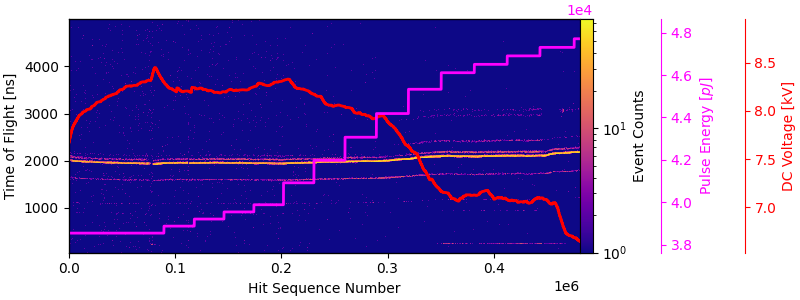

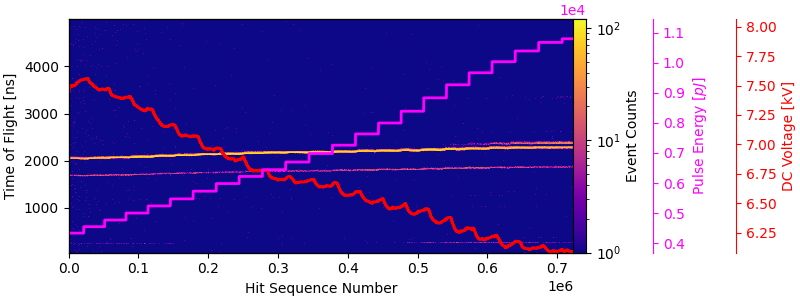

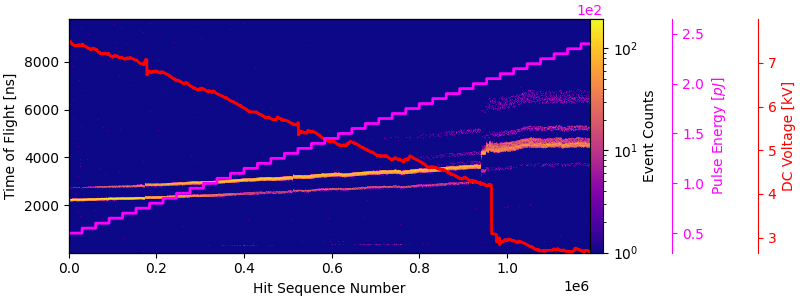

In [16]:
data_loadcrop.plot_crop_experiment_history(data_171fs, variables, max_tof=5000, data_crop=False, pulse_plot=True, pulse_mode='laser')
data_loadcrop.plot_crop_experiment_history(data_12fs, variables, max_tof=5000, data_crop=False, pulse_plot=True, pulse_mode='laser')
data_loadcrop.plot_crop_experiment_history(data_12ps, variables, max_tof=15000, data_crop=False, pulse_plot=True, pulse_mode='laser')

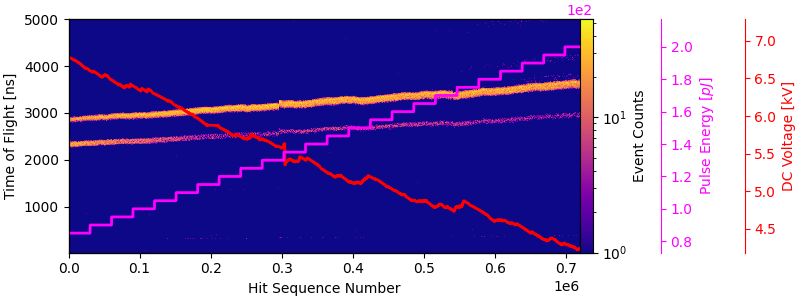

In [17]:
# Assuming 'df' is your DataFrame
# data_12ps = data_12ps[300000:1188733].reset_index(drop=True)
data_12ps = data_12ps[210000:940000].reset_index(drop=True)
# cropped_data_171fs = data_171fs.iloc[0:].reset_index(drop=True)
data_loadcrop.plot_crop_experiment_history(data_12ps, variables, max_tof=5000, data_crop=False, pulse_plot=True, pulse_mode='laser')

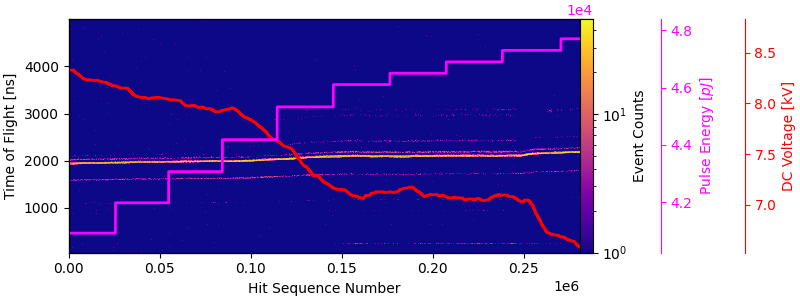

In [18]:
# Assuming 'df' is your DataFrame
cropped_data_171fs = data_171fs.iloc[200000:].reset_index(drop=True)
# cropped_data_171fs = data_171fs.iloc[0:].reset_index(drop=True)
data_loadcrop.plot_crop_experiment_history(cropped_data_171fs, variables, max_tof=5000, data_crop=False, pulse_plot=True, pulse_mode='laser')

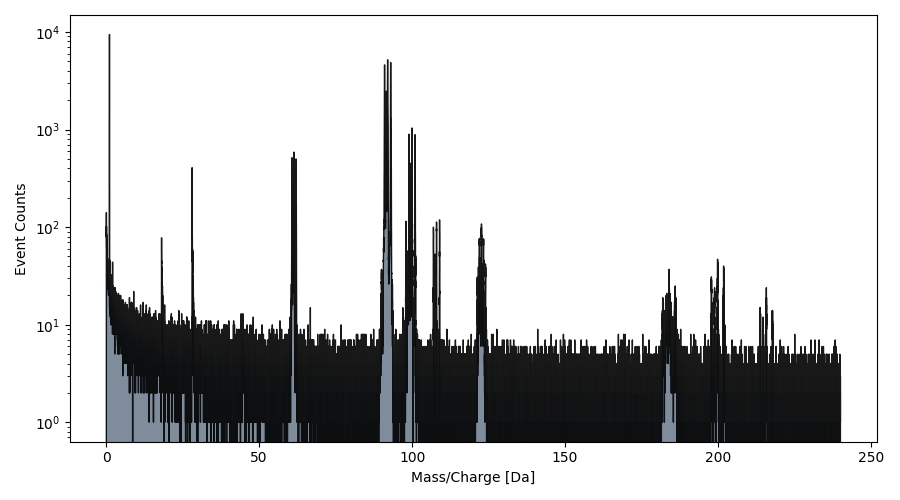

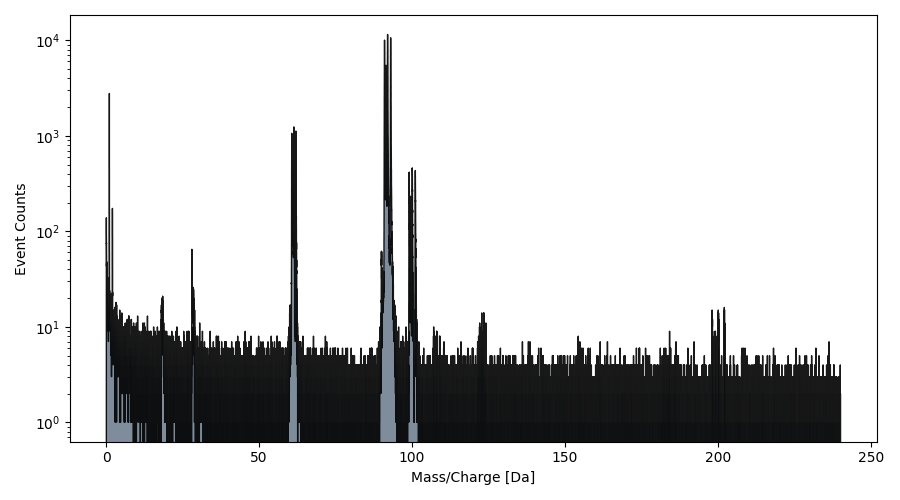

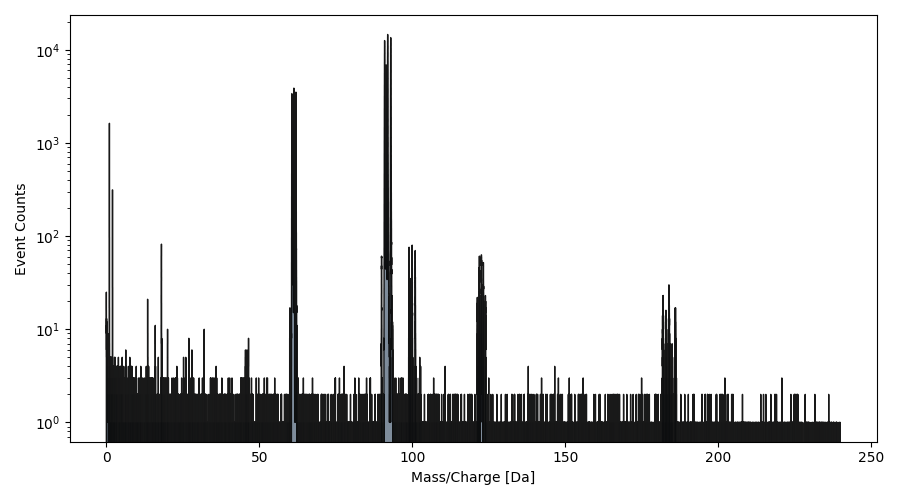

In [19]:
bin_size = 0.01
hist = data_171fs['mc (Da)'].to_numpy()
mc_hist = mc_plot.AptHistPlotter(hist[hist < 240], variables)
mc_hist.plot_histogram(bin_width=bin_size, label='mc', steps='stepfilled', log=True)
mc_hist.find_peaks_and_widths()
mc_hist.plot_hist_info_legend(loc='right')
hist = data_12fs['mc (Da)'].to_numpy()
mc_hist = mc_plot.AptHistPlotter(hist[hist < 240], variables)
mc_hist.plot_histogram(bin_width=bin_size, label='mc', steps='stepfilled', log=True)
mc_hist.find_peaks_and_widths()
mc_hist.plot_hist_info_legend(loc='right')
hist = data_12ps['mc (Da)'].to_numpy()
mc_hist = mc_plot.AptHistPlotter(hist[hist < 240], variables)
mc_hist.plot_histogram(bin_width=bin_size, label='mc', steps='stepfilled', log=True)
mc_hist.find_peaks_and_widths()
mc_hist.plot_hist_info_legend(loc='right')

9


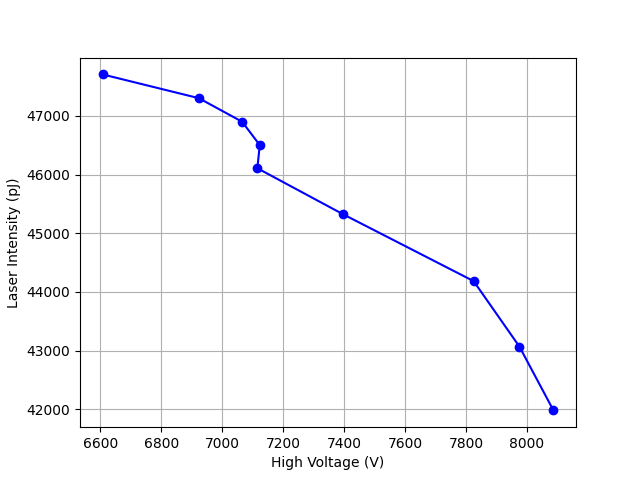

In [20]:
intensity = cropped_data_171fs['pulse'].to_numpy()
dc_voltage = cropped_data_171fs['high_voltage (V)'].to_numpy()
mc = cropped_data_171fs['mc (Da)'].to_numpy()

steps = find_step_changes(intensity)
print(len(steps))
intensity_values_171fs = extract_step_values(intensity, steps)
# intensity_values = np.log(intensity_values)
voltage_means_171fs = calculate_step_means(dc_voltage, steps)
mc_steps_171fs = calculate_step_values(mc, steps)

# Plotting
# Create a figure and axis
fig, ax = plt.subplots()
plt.plot(voltage_means_171fs, intensity_values_171fs, marker='o', linestyle='-', color='b')

plt.xlabel('High Voltage (V)')
plt.ylabel('Laser Intensity (pJ)')
# ax.set_yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

22


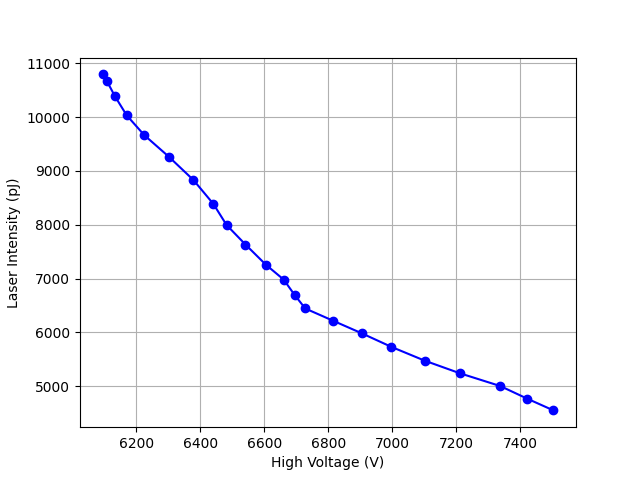

In [21]:
intensity = data_12fs['pulse'].to_numpy()
dc_voltage = data_12fs['high_voltage (V)'].to_numpy()
mc = data_12fs['mc (Da)'].to_numpy()

steps = find_step_changes(intensity)
print(len(steps))
intensity_values_12fs = extract_step_values(intensity, steps)
# intensity_values = np.log(intensity_values)
voltage_means_12fs = calculate_step_means(dc_voltage, steps)
mc_steps_12fs = calculate_step_values(mc, steps)

# Plotting
# Create a figure and axis
fig, ax = plt.subplots()
plt.plot(voltage_means_12fs, intensity_values_12fs, marker='o', linestyle='-', color='b')

plt.xlabel('High Voltage (V)')
plt.ylabel('Laser Intensity (pJ)')
# ax.set_yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

24


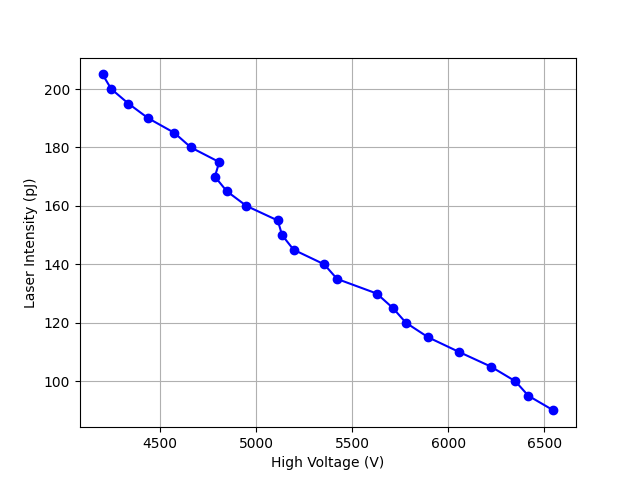

In [22]:
intensity = data_12ps['pulse'].to_numpy()
dc_voltage = data_12ps['high_voltage (V)'].to_numpy()
mc = data_12ps['mc (Da)'].to_numpy()

steps = find_step_changes(intensity)
print(len(steps))
intensity_values_12ps = extract_step_values(intensity, steps)
# intensity_values = np.log(intensity_values)
voltage_means_12ps = calculate_step_means(dc_voltage, steps)
mc_steps_12ps = calculate_step_values(mc, steps)

# Plotting
# Create a figure and axis
fig, ax = plt.subplots()
plt.plot(voltage_means_12ps, intensity_values_12ps, marker='o', linestyle='-', color='b')

plt.xlabel('High Voltage (V)')
plt.ylabel('Laser Intensity (pJ)')
# ax.set_yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [34]:
ratios_w2_3_r = []  # List to store the ratios
ratios_w1_2_r = []  # List to store the ratios

In [35]:
# 171fs
range_1 = [181.4, 186.6]
range_2 = [90.2, 93.5]
range_3 = [60.3, 62.4]
    
ratios_w1_2_r_tmp, ratios_w2_3_r_tmp = ratio_calculator(mc_steps_171fs, range_1, range_2, range_3, flag_oxides='none')
ratios_w1_2_r.append(ratios_w1_2_r_tmp)
ratios_w2_3_r.append(ratios_w2_3_r_tmp)

In [36]:
# 12fs

range_1 = [197.7, 202.5]
range_2 = [90.6, 93.7]
range_3 = [60.4, 62.5]

ratios_w1_2_r_tmp, ratios_w2_3_r_tmp = ratio_calculator(mc_steps_12fs, range_1, range_2, range_3, flag_oxides='none')
ratios_w1_2_r.append(ratios_w1_2_r_tmp)
ratios_w2_3_r.append(ratios_w2_3_r_tmp)

In [37]:
# 12ps old dataset
# range_1 = [183.6, 184.2]
# range_2 = [91.7, 92.2]
# range_3 = [61.1, 61.4]
# 12ps new dataset
range_1 = [181.6, 186.5]
range_2 = [90.6, 93.6]
range_3 = [60.4, 62.4]

ratios_w1_2_r_tmp, ratios_w2_3_r_tmp = ratio_calculator(mc_steps_12ps, range_1, range_2, range_3, flag_oxides='none')
ratios_w1_2_r.append(ratios_w1_2_r_tmp)
ratios_w2_3_r.append(ratios_w2_3_r_tmp)


In [38]:
# with oxides fs
range_1 = [197.7, 202.5]
range_2 = [90.6, 93.7]
range_3 = [60.4, 62.5]

ratios_w1_2_r_tmp, ratios_w2_3_r_tmp = ratio_calculator(mc_steps_12fs, range_1, range_2, range_3, flag_oxides='fs')

ratio_12_fs_r_w2_3_oxide = ratios_w2_3_r_tmp

len(w), len(oxides) 19159 139
with oxides calculation
len(w), len(oxides) 21273 105
with oxides calculation
len(w), len(oxides) 23357 115
with oxides calculation
len(w), len(oxides) 25052 76
with oxides calculation
len(w), len(oxides) 26382 57
with oxides calculation
len(w), len(oxides) 27346 57
with oxides calculation
len(w), len(oxides) 27100 52
with oxides calculation
len(w), len(oxides) 28255 47
with oxides calculation
len(w), len(oxides) 28116 49
with oxides calculation
len(w), len(oxides) 28376 53
with oxides calculation
len(w), len(oxides) 28151 64
with oxides calculation
len(w), len(oxides) 27508 61
with oxides calculation
len(w), len(oxides) 26832 56
with oxides calculation
len(w), len(oxides) 26003 64
with oxides calculation
len(w), len(oxides) 25547 73
with oxides calculation
len(w), len(oxides) 25858 111
with oxides calculation
len(w), len(oxides) 25177 411
with oxides calculation
len(w), len(oxides) 25060 1156
with oxides calculation
len(w), len(oxides) 23807 2663
with oxi

In [39]:
# with oxides ps
# 12ps old dataset
# range_1 = [183.6, 184.2]
# range_2 = [91.7, 92.2]
# range_3 = [61.1, 61.4]
# 12ps new dataset
range_1 = [181.6, 186.5]
range_2 = [90.6, 93.6]
range_3 = [60.4, 62.4]

ratios_w1_2_r_tmp, ratios_w2_3_r_tmp = ratio_calculator(mc_steps_12ps, range_1, range_2, range_3, flag_oxides='ps')

ratio_12_ps_r_w2_3_oxide = ratios_w2_3_r_tmp

len(w), len(oxides) 16529 4
with oxides calculation
len(w), len(oxides) 18957 6
with oxides calculation
len(w), len(oxides) 20315 3
with oxides calculation
len(w), len(oxides) 22486 2
with oxides calculation
len(w), len(oxides) 24464 4
with oxides calculation
len(w), len(oxides) 25670 3
with oxides calculation
len(w), len(oxides) 26349 1
with oxides calculation
len(w), len(oxides) 26481 1
with oxides calculation
len(w), len(oxides) 26681 3
with oxides calculation
len(w), len(oxides) 25896 4
with oxides calculation
len(w), len(oxides) 25940 8
with oxides calculation
len(w), len(oxides) 25822 8
with oxides calculation
len(w), len(oxides) 25774 26
with oxides calculation
len(w), len(oxides) 25917 20
with oxides calculation
len(w), len(oxides) 25684 45
with oxides calculation
len(w), len(oxides) 25705 69
with oxides calculation
len(w), len(oxides) 25659 107
with oxides calculation
len(w), len(oxides) 25835 102
with oxides calculation
len(w), len(oxides) 25837 296
with oxides calculation
le

In [40]:
ratio_12_ps_r_w2_3 = np.array(ratios_w2_3_r[2])
ratio_12_fs_r_w2_3 = np.array(ratios_w2_3_r[1])
ratio_171_fs_r_w2_3 = np.array(ratios_w2_3_r[0])


ratio_12_ps_r_w1_2 = np.array(ratios_w1_2_r[2])
ratio_12_fs_r_w1_2 = np.array(ratios_w1_2_r[1])
ratio_171_fs_r_w1_2 = np.array(ratios_w1_2_r[0])


pe_12_ps = np.array(intensity_values_12ps)
pe_12_fs = np.array(intensity_values_12fs)
pe_171_fs = np.array(intensity_values_171fs)


fs min max last 7.5678431372549015 18.81781914893617 12.709531013615734
fs min max last 1.3436001625355547 12.709531013615734 12.709531013615734


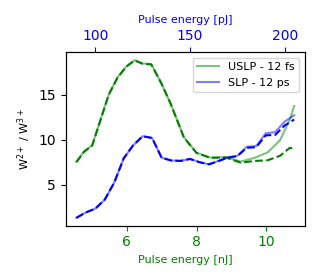

In [43]:
# Plotting

fig = plt.figure(figsize=(3.2,2.8))
ax1=fig.add_subplot(111, label="1")
# ax2=fig.add_subplot(111, label="2", frame_on=False)
ax1.plot(pe_12_fs/1000, ratio_12_fs_r_w2_3, linestyle='--', color='green')
ax1.plot(pe_12_fs/1000, ratio_12_fs_r_w2_3_oxide, color='green', label='USLP - 12 fs', alpha=0.5)

ax1.set_xlabel('Pulse energy [nJ]', color='green', fontsize=8)
ax1.set_ylabel('W$^{2+}$ / W$^{3+}$', fontsize=8)
ax1.tick_params(axis='x', colors='green')  # Set Y-axis tick labels color to red
# ax1.set_yscale('log')


ax2 = ax1.twiny()  # Create a secondary x-axis
ax2.plot(pe_12_ps, ratio_12_ps_r_w2_3, color='blue', linestyle='--')  # Invisible plot to create the secondary x-axis
ax2.plot(pe_12_ps, ratio_12_ps_r_w2_3_oxide, color='blue', label='SLP - 12 ps', alpha=0.5)  # Invisible plot to create the secondary x-axis
ax2.set_xlabel('Pulse energy [pJ]', color='blue', fontsize=8)
ax2.tick_params(axis='x', colors='blue')  # Set Y-axis tick labels color to red
ax2.tick_params(axis='y', colors='blue')  # Set Y-axis tick labels color to red

# Combine legends from ax1 and ax2
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=8)

plt.tight_layout()
plt.savefig(variables.result_path + "/temperature.png", format="png", dpi=600)
plt.savefig(variables.result_path + "/temperature.svg", format="svg", dpi=600)

print('fs min max last', np.min(ratio_12_fs_r_w2_3_oxide), np.max(ratio_12_fs_r_w2_3_oxide), ratio_12_ps_r_w2_3_oxide[-1])
print('fs min max last', np.min(ratio_12_ps_r_w2_3_oxide), np.max(ratio_12_ps_r_w2_3_oxide), ratio_12_ps_r_w2_3_oxide[-1])
plt.show()

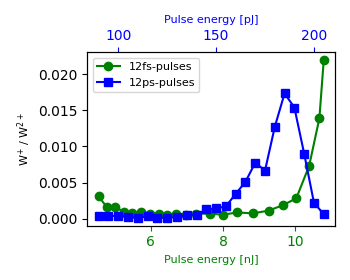

In [45]:
# Plotting

fig = plt.figure(figsize=(3.5,2.8))
ax1=fig.add_subplot(111, label="1")
# ax2=fig.add_subplot(111, label="2", frame_on=False)
ax1.plot(pe_12_fs/1000, ratio_12_fs_r_w1_2, marker='o', label='12fs-pulses', color='green')

ax1.set_xlabel('Pulse energy [nJ]', color='green', fontsize=8)
ax1.set_ylabel('W$^{+}$ / W$^{2+}$', fontsize=8)
ax1.tick_params(axis='x', colors='green')  # Set Y-axis tick labels color to red
# ax1.set_yscale('log')


ax2 = ax1.twiny()  # Create a secondary x-axis
ax2.plot(pe_12_ps, ratio_12_ps_r_w1_2, marker='s', color='blue', label='12ps-pulses')  # Invisible plot to create the secondary x-axis
ax2.set_xlabel('Pulse energy [pJ]', color='blue', fontsize=8)
ax2.tick_params(axis='x', colors='blue')  # Set Y-axis tick labels color to red
ax2.tick_params(axis='y', colors='blue')  # Set Y-axis tick labels color to red

# Combine legends from ax1 and ax2
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=8)

plt.tight_layout()
# plt.savefig(variables.result_path + "temperature.png", format="png", dpi=600)
# plt.savefig(variables.result_path + "temperature.svg", format="svg", dpi=600)
plt.show()

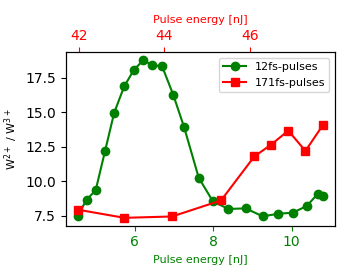

In [46]:
# Plotting

fig = plt.figure(figsize=(3.5,2.8))
ax1=fig.add_subplot(111, label="1")
# ax2=fig.add_subplot(111, label="2", frame_on=False)
ax1.plot(pe_12_fs/1000, ratio_12_fs_r_w2_3, marker='o', label='12fs-pulses', color='green')

ax1.set_ylabel('W$^{2+}$ / W$^{3+}$')
ax1.set_xlabel('Pulse energy [nJ]', color='green', fontsize=8)
ax1.set_ylabel('W$^{2+}$ / W$^{3+}$', fontsize=8)
ax1.tick_params(axis='x', colors='green')  # Set Y-axis tick labels color to red
# ax1.set_yscale('log')

ax2 = ax1.twiny()  # Create a secondary x-axis
ax2.plot(pe_171_fs / 1e3, ratio_171_fs_r_w2_3, marker='s', color='red', label='171fs-pulses')  # Invisible plot to create the secondary x-axis
ax2.set_xlabel('Pulse energy [nJ]', color='red', fontsize=8)
ax2.tick_params(axis='x', colors='red')  # Set Y-axis tick labels color to red
ax2.tick_params(axis='y', colors='red')  # Set Y-axis tick labels color to red


# Combine legends from ax1 and ax2
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=8)

plt.tight_layout()
# plt.savefig(variables.result_path + "temperature.png", format="png", dpi=600)
# plt.savefig(variables.result_path + "temperature.svg", format="svg", dpi=600)
plt.show()

C:\Users\APTUser\AppData\Local\Temp\ipykernel_25300\1015615261.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(3.5,2.8))


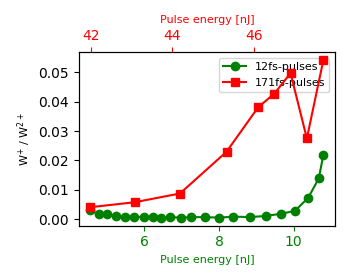

In [47]:
# Plotting

fig = plt.figure(figsize=(3.5,2.8))
ax1=fig.add_subplot(111, label="1")
# ax2=fig.add_subplot(111, label="2", frame_on=False)
ax1.plot(pe_12_fs/1000, ratio_12_fs_r_w1_2, marker='o', label='12fs-pulses', color='green')


ax1.set_xlabel('Pulse energy [nJ]', color='green', fontsize=8)
ax1.set_ylabel('W$^{+}$ / W$^{2+}$', fontsize=8)
ax1.tick_params(axis='x', colors='green')  # Set Y-axis tick labels color to red
# ax1.set_yscale('log')

ax2 = ax1.twiny()  # Create a secondary x-axis
ax2.plot(pe_171_fs / 1e3, ratio_171_fs_r_w1_2, marker='s', color='red', label='171fs-pulses')  # Invisible plot to create the secondary x-axis
ax2.set_xlabel('Pulse energy [nJ]', color='red', fontsize=8)
ax2.tick_params(axis='x', colors='red')  # Set Y-axis tick labels color to red
ax2.tick_params(axis='y', colors='red')  # Set Y-axis tick labels color to red


# Combine legends from ax1 and ax2
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=8)

plt.tight_layout()
# plt.savefig(variables.result_path + "temperature.png", format="png", dpi=600)
# plt.savefig(variables.result_path + "temperature.svg", format="svg", dpi=600)
plt.show()

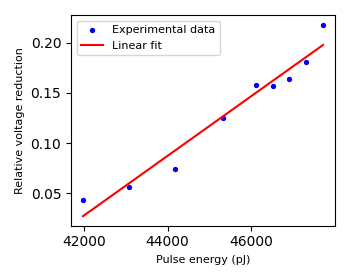

In [48]:
# Convert lists to NumPy arrays
intensity_values_s = np.array(intensity_values_171fs)
voltage_means_s = np.array(voltage_means_171fs)
dc_voltage = data_171fs['high_voltage (V)'].to_numpy()

intensity_values_s = (intensity_values_s - np.min(intensity_values_s)) / (np.max(intensity_values_s) - np.min(intensity_values_s))
# intensity_values_s = (intensity_values_s) / (np.max(intensity_values_s))
# intensity_values_s = (intensity_values_s) / 40000
voltage_means_s = (np.max(dc_voltage) - voltage_means_s) / np.max(dc_voltage)


# voltage_means_s = np.array(voltage_reduction)
# Split the data into two ranges (0 to 19 and 20 to the end)
intensity_values_1 = intensity_values_s[:]
voltage_means_1 = voltage_means_s[:]

log_intensity_values_1 = intensity_values_1

# Define linear and quadratic functions for log-transformed data
def linear_func(x, a, b):
    return a * x + b

def square_root_func(x, a, b):
    return a * np.sqrt(x) + b

# Fit a linear function for both ranges
params_linear_log_1, _ = curve_fit(linear_func, log_intensity_values_1, voltage_means_1)
# params_linear_log_2, _ = curve_fit(linear_func_log, voltage_means_2, log_intensity_values_2)

# Fit quadratic function for both ranges
params_quadratic_log_1, _ = curve_fit(square_root_func, log_intensity_values_1, voltage_means_1)
# params_quadratic_log_2, _ = curve_fit(quadratic_func_log, voltage_means_2, log_intensity_values_2)


fig = plt.figure(figsize=(3.5,2.8))
ax=fig.add_subplot(111, label="1")
# ax2=fig.add_subplot(111, label="2", frame_on=False)

# Plotting for the first range (0 to 19)
ax.scatter(np.array(intensity_values_171fs), voltage_means_1, label='Experimental data', color='b', s=8)
# x_fit = np.linspace(min(log_intensity_values_1), max(log_intensity_values_1), 100)
ax.plot(np.array(intensity_values_171fs), linear_func(log_intensity_values_1, *params_linear_log_1), label='Linear fit', color='r')
# ax.plot(np.array(intensity_values_171fs), square_root_func(log_intensity_values_1, *params_quadratic_log_1), label='Square-root fit', color='g')


# plt.yscale('log')  # Set y-axis to logarithmic scale
ax.set_ylabel('Relative voltage reduction', fontsize=8)
ax.set_xlabel('Pulse energy (pJ)', fontsize=8)
ax.legend(fontsize=8)



# scatter_plot = ax2.scatter(intensity_values, voltage_means, color='b')
# ax2.xaxis.tick_top()
# ax2.yaxis.tick_right()
# ax2.xaxis.set_label_position('top') 
# ax2.yaxis.set_label_position('right') 
# ax2.set_ylabel('Voltage [V]')
# ax2.set_xlabel('Pulse energy [pJ]')
# scatter_plot.remove()
# plt.grid(True)
plt.tight_layout()
# rcParams['font.sans-serif'] = ['Arial']
# rcParams['svg.fonttype'] = 'none'
# plt.savefig(variables.result_path + "fs_PE_vs_voltage.png", format="png", dpi=600)
# plt.savefig(variables.result_path + "fs_PE_vs_voltage.svg", format="svg", dpi=600)
# plt.savefig(variables.result_path + "LEAP_PE_vs_voltage.png", format="png", dpi=600)
# plt.savefig(variables.result_path + "LEAP_PE_vs_voltage.svg", format="svg", dpi=600)

plt.show()


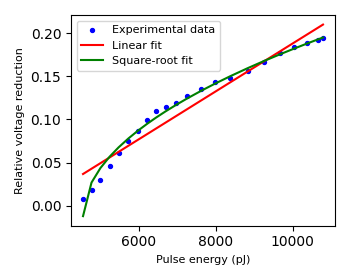

In [49]:
# Convert lists to NumPy arrays
intensity_values_s = np.array(intensity_values_12fs)
voltage_means_s = np.array(voltage_means_12fs)
dc_voltage = data_12fs['high_voltage (V)'].to_numpy()

intensity_values_s = (intensity_values_s - np.min(intensity_values_s)) / (np.max(intensity_values_s) - np.min(intensity_values_s))
# intensity_values_s = (intensity_values_s) / (np.max(intensity_values_s))
# intensity_values_s = (intensity_values_s) / 40000
voltage_means_s = (np.max(dc_voltage) - voltage_means_s) / np.max(dc_voltage)


# voltage_means_s = np.array(voltage_reduction)
# Split the data into two ranges (0 to 19 and 20 to the end)
intensity_values_1 = intensity_values_s[:]
voltage_means_1 = voltage_means_s[:]

log_intensity_values_1 = intensity_values_1

# Define linear and quadratic functions for log-transformed data
def linear_func(x, a, b):
    return a * x + b

def square_root_func(x, a, b):
    return a * np.sqrt(x) + b

# Fit a linear function for both ranges
params_linear_log_1, _ = curve_fit(linear_func, log_intensity_values_1, voltage_means_1)
# params_linear_log_2, _ = curve_fit(linear_func_log, voltage_means_2, log_intensity_values_2)

# Fit quadratic function for both ranges
params_quadratic_log_1, _ = curve_fit(square_root_func, log_intensity_values_1, voltage_means_1)
# params_quadratic_log_2, _ = curve_fit(quadratic_func_log, voltage_means_2, log_intensity_values_2)


fig = plt.figure(figsize=(3.5,2.8))
ax=fig.add_subplot(111, label="1")
# ax2=fig.add_subplot(111, label="2", frame_on=False)

# Plotting for the first range (0 to 19)
ax.scatter(np.array(intensity_values_12fs), voltage_means_1, label='Experimental data', color='b', s=8)
# x_fit = np.linspace(min(log_intensity_values_1), max(log_intensity_values_1), 100)
ax.plot(np.array(intensity_values_12fs), linear_func(log_intensity_values_1, *params_linear_log_1), label='Linear fit', color='r')
ax.plot(np.array(intensity_values_12fs), square_root_func(log_intensity_values_1, *params_quadratic_log_1), label='Square-root fit', color='g')


# plt.yscale('log')  # Set y-axis to logarithmic scale
ax.set_ylabel('Relative voltage reduction', fontsize=8)
ax.set_xlabel('Pulse energy (pJ)', fontsize=8)
ax.legend(fontsize=8)



# scatter_plot = ax2.scatter(intensity_values, voltage_means, color='b')
# ax2.xaxis.tick_top()
# ax2.yaxis.tick_right()
# ax2.xaxis.set_label_position('top') 
# ax2.yaxis.set_label_position('right') 
# ax2.set_ylabel('Voltage [V]')
# ax2.set_xlabel('Pulse energy [pJ]')
# scatter_plot.remove()
# plt.grid(True)
plt.tight_layout()
# rcParams['font.sans-serif'] = ['Arial']
# rcParams['svg.fonttype'] = 'none'
# plt.savefig(variables.result_path + "fs_PE_vs_voltage.png", format="png", dpi=600)
# plt.savefig(variables.result_path + "fs_PE_vs_voltage.svg", format="svg", dpi=600)
# plt.savefig(variables.result_path + "LEAP_PE_vs_voltage.png", format="png", dpi=600)
# plt.savefig(variables.result_path + "LEAP_PE_vs_voltage.svg", format="svg", dpi=600)

plt.show()


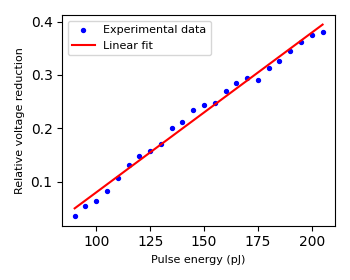

In [50]:
# Convert lists to NumPy arrays
intensity_values_s = np.array(intensity_values_12ps)
voltage_means_s = np.array(voltage_means_12ps)
dc_voltage = data_12ps['high_voltage (V)'].to_numpy()

intensity_values_s = (intensity_values_s - np.min(intensity_values_s)) / (np.max(intensity_values_s) - np.min(intensity_values_s))
# intensity_values_s = (intensity_values_s) / (np.max(intensity_values_s))
# intensity_values_s = (intensity_values_s) / 40000
voltage_means_s = (np.max(dc_voltage) - voltage_means_s) / np.max(dc_voltage)


# voltage_means_s = np.array(voltage_reduction)
# Split the data into two ranges (0 to 19 and 20 to the end)
intensity_values_1 = intensity_values_s[:]
voltage_means_1 = voltage_means_s[:]

log_intensity_values_1 = intensity_values_1

# Define linear and quadratic functions for log-transformed data
def linear_func(x, a, b):
    return a * x + b

def square_root_func(x, a, b):
    return a * np.sqrt(x) + b

# Fit a linear function for both ranges
params_linear_log_1, _ = curve_fit(linear_func, log_intensity_values_1, voltage_means_1)
# params_linear_log_2, _ = curve_fit(linear_func_log, voltage_means_2, log_intensity_values_2)

# Fit quadratic function for both ranges
params_quadratic_log_1, _ = curve_fit(square_root_func, log_intensity_values_1, voltage_means_1)
# params_quadratic_log_2, _ = curve_fit(quadratic_func_log, voltage_means_2, log_intensity_values_2)


fig = plt.figure(figsize=(3.5,2.8))
ax=fig.add_subplot(111, label="1")
# ax2=fig.add_subplot(111, label="2", frame_on=False)

# Plotting for the first range (0 to 19)
ax.scatter(np.array(intensity_values_12ps), voltage_means_1, label='Experimental data', color='b', s=8)
# x_fit = np.linspace(min(log_intensity_values_1), max(log_intensity_values_1), 100)
ax.plot(np.array(intensity_values_12ps), linear_func(log_intensity_values_1, *params_linear_log_1), label='Linear fit', color='r')
# ax.plot(np.array(voltage_means_12ps), square_root_func(log_intensity_values_1, *params_quadratic_log_1), label='Square-root fit', color='g')


# plt.yscale('log')  # Set y-axis to logarithmic scale
ax.set_ylabel('Relative voltage reduction', fontsize=8)
ax.set_xlabel('Pulse energy (pJ)', fontsize=8)
ax.legend(fontsize=8)



# scatter_plot = ax2.scatter(intensity_values, voltage_means, color='b')
# ax2.xaxis.tick_top()
# ax2.yaxis.tick_right()
# ax2.xaxis.set_label_position('top') 
# ax2.yaxis.set_label_position('right') 
# ax2.set_ylabel('Voltage [V]')
# ax2.set_xlabel('Pulse energy [pJ]')
# scatter_plot.remove()
# plt.grid(True)
plt.tight_layout()
# rcParams['font.sans-serif'] = ['Arial']
# rcParams['svg.fonttype'] = 'none'
# plt.savefig(variables.result_path + "fs_PE_vs_voltage.png", format="png", dpi=600)
# plt.savefig(variables.result_path + "fs_PE_vs_voltage.svg", format="svg", dpi=600)
plt.savefig(variables.result_path + "/LEAP_PE_vs_voltage.png", format="png", dpi=600)
plt.savefig(variables.result_path + "/LEAP_PE_vs_voltage.svg", format="svg", dpi=600)

plt.show()


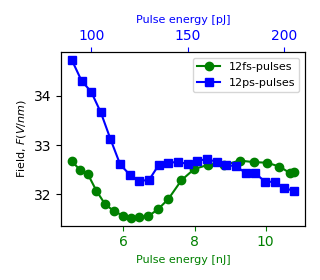

In [54]:
# static filed calculation
# Based on the https://academic.oup.com/mam/article/30/3/466/7688643
ratio_12_ps_r_w3_2 = 1 / ratio_12_ps_r_w2_3
ratio_12_fs_r_w3_2 = 1 / ratio_12_fs_r_w2_3

a = 40.21
b = 0.1849
filed_12ps = a * (1- (b / (ratio_12_ps_r_w3_2**0.3 + b + 0.256)))
filed_12fs = a * (1- (b / (ratio_12_fs_r_w3_2**0.3 + b + 0.256)))

# Creating the plot
fig, ax1 = plt.subplots(figsize=(3.2,2.8))

# Plotting for pe_12_fs (bottom x-axis)
ax1.plot(pe_12_fs / 1000, filed_12fs, marker='o', label='12fs-pulses', color='green')
ax1.set_xlabel('Pulse energy [nJ]', color='green', fontsize=8)
ax1.set_ylabel('Field', fontsize=8)
ax1.tick_params(axis='x', colors='green')

# Secondary x-axis for pe_12_ps (top x-axis)
ax2 = ax1.twiny()
ax2.plot(pe_12_ps, filed_12ps, marker='s', color='blue', label='12ps-pulses')
ax2.set_xlabel('Pulse energy [pJ]', color='blue', fontsize=8)
ax2.tick_params(axis='x', colors='blue')

# Shared y-axis (field) - already done via ax1
ax1.set_ylabel('Field, $F (V/nm)$', fontsize=8)

# Combine legends from ax1 and ax2
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,  loc='upper right', fontsize=8)

# Adjust layout
plt.tight_layout()
plt.savefig(variables.result_path + "/filed_LEAP_PE_ps_voltage.png", format="png", dpi=600)
plt.savefig(variables.result_path + "/filed_LEAP_PE_ps_voltage.svg", format="svg", dpi=600)
plt.show()



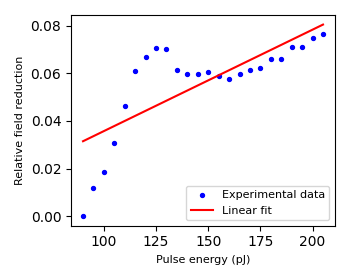

In [52]:
# Normalize intensity values (as done in the previous code)
intensity_values_s = np.array(intensity_values_12ps)
intensity_values_s = (intensity_values_s - np.min(intensity_values_s)) / (np.max(intensity_values_s) - np.min(intensity_values_s))

filed_12ps_s = (filed_12ps[0] - filed_12ps) / filed_12ps[0]

# Define linear and square root functions for fitting
def linear_func(x, a, b):
    return a * x + b

def square_root_func(x, a, b):
    return a * np.sqrt(x) + b

# Fit a linear function for the log-transformed data
params_linear_log_1, _ = curve_fit(linear_func, intensity_values_s, filed_12ps_s)

# Fit a quadratic function for the log-transformed data
params_quadratic_log_1, _ = curve_fit(square_root_func, intensity_values_s, filed_12ps_s)

# Create a plot for field reduction
fig = plt.figure(figsize=(3.5, 2.8))
ax = fig.add_subplot(111, label="1")

# Scatter plot for the experimental data (relative field reduction)
ax.scatter(np.array(intensity_values_12ps), filed_12ps_s, label='Experimental data', color='b', s=8)

# Plot the linear fit
ax.plot(np.array(intensity_values_12ps), linear_func(intensity_values_s, *params_linear_log_1), label='Linear fit', color='r')

# You can also plot the square-root fit if needed
# ax.plot(np.array(intensity_values_12ps), square_root_func(intensity_values_s, *params_quadratic_log_1), label='Square-root fit', color='g')

# Labeling and legends
ax.set_ylabel('Relative field reduction', fontsize=8)
ax.set_xlabel('Pulse energy (pJ)', fontsize=8)
ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


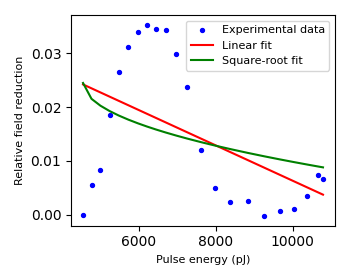

In [53]:
# Normalize intensity values (as done in the previous code)
intensity_values_s = np.array(intensity_values_12fs)
intensity_values_s = (intensity_values_s - np.min(intensity_values_s)) / (np.max(intensity_values_s) - np.min(intensity_values_s))

filed_12fs_s = (filed_12fs[0] - filed_12fs) / filed_12fs[0]

# Define linear and square root functions for fitting
def linear_func(x, a, b):
    return a * x + b

def square_root_func(x, a, b):
    return a * np.sqrt(x) + b

# Fit a linear function for the log-transformed data
params_linear_log_1, _ = curve_fit(linear_func, intensity_values_s, filed_12fs_s)

# Fit a quadratic function for the log-transformed data
params_quadratic_log_1, _ = curve_fit(square_root_func, intensity_values_s, filed_12fs_s)

# Create a plot for field reduction
fig = plt.figure(figsize=(3.5, 2.8))
ax = fig.add_subplot(111, label="1")

# Scatter plot for the experimental data (relative field reduction)
ax.scatter(np.array(intensity_values_12fs), filed_12fs_s, label='Experimental data', color='b', s=8)

# Plot the linear fit
ax.plot(np.array(intensity_values_12fs), linear_func(intensity_values_s, *params_linear_log_1), label='Linear fit', color='r')

# You can also plot the square-root fit if needed
ax.plot(np.array(intensity_values_12fs), square_root_func(intensity_values_s, *params_quadratic_log_1), label='Square-root fit', color='g')

# Labeling and legends
ax.set_ylabel('Relative field reduction', fontsize=8)
ax.set_xlabel('Pulse energy (pJ)', fontsize=8)
ax.legend(fontsize=8)

plt.tight_layout()
plt.show()